# Cornhole (Monte Carlo)
### The purpose of this script is to find a winning toss using Monte Carlo methods

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### Linear Interpolation Routine

In [64]:
def LinearInterp(x, x1, y1, x2, y2):
    # Find y with x, and known points (x1, y1) and (x2, y2) 
    y = y1 + ((y2-y1)/(x2-x1))*(x-x1)
    return y

### Acceleration Function

In [65]:
def Find_CornHole_Derivs_for_Solver(s, t):
    # This function accepts a state (s) and time (t)
    # The state input breaks down into:
    # s[0] is position-x (r_x)
    # s[1] is position-y (r_y)
    # s[2] is velocity-x (v_x)
    # s[3] is velocity-y (v_y)
    # The function returns the state derivatives
    #   return[0] is dr/dt-x (v_x)
    #   return[1] is dr/dt-y (v_y)
    #   return[2] is dv/dt-x (a_x)
    #   return[3] is dv/dt-y (a_y)
    vx_now, vy_now = s[2], s[3]
    v_now = np.array([vx_now, vy_now])
    ax_now = -k * np.linalg.norm(v_now)*vx_now + a0[0]
    ay_now = -k * np.linalg.norm(v_now)*vy_now + a0[1]
    return np.array([vx_now, vy_now, ax_now, ay_now])

### Solver for Throw

In [77]:
def CornholeToss(r_start, v_start, theta_start):

    t = np.linspace(t_start, t_end, N)
    v0 = v_start * np.array([np.cos(theta_start * np.pi/180.0), np.sin(theta_start * np.pi/180.0)])  # m/s
    r0 = np.array([0.0, r_start])  # m
    
    s0 = np.array([r0[0], r0[1], v0[0], v0[1]])  # Initial state
    s_solver = odeint(Find_CornHole_Derivs_for_Solver, s0, t)

#     r_solver = np.vstack([s_solver[:, 0], s_solver[:, 1]]).T
#     v_solver = np.vstack([s_solver[:, 2], s_solver[:, 3]]).T
    
    # Determine the closest point to the hole:
    x_hole_midpoint = hole_midpoint[0]
    y_hole_midpoint = hole_midpoint[1]
    
#     dist = np.sqrt((s_solver[:,0] - x_hole_midpoint)**2 + (s_solver[:,1] - y_hole_midpoint)**2)
    dist = 2.0
    Closest_Index = dist.argmin()    
    Closest_Point = dist[Closest_Index]        
    
    return Closest_Point, Closest_Index, r_solver, v_solver

In [86]:
def CornholeToss2(r_start, v_start, theta_start):

    t = np.linspace(t_start, t_end, N-5)
    v0 = v_start * np.array([np.cos(theta_start * np.pi/180.0), np.sin(theta_start * np.pi/180.0)])  # m/s
    r0 = np.array([0.0, r_start])  # m
    
    s0 = np.array([r0[0], r0[1], v0[0], v0[1]])  # Initial state
    s_solver = odeint(Find_CornHole_Derivs_for_Solver, s0, t)
    
    return 0

### Cornhole game specifics

In [78]:
# Cornhole target specifics
cornhole_distance = 9.144  # (m) Pitch distance (30 ft)
cornhole_radius = 0.1524/2  # (m) 6/2 inch hole
cornhole_height = 0.2667  # (m) 10.5 inches - The angle of the board is 9.6 degrees
cornhole_target = np.array([cornhole_distance, cornhole_height])
target_ll = np.array([cornhole_distance - cornhole_radius*np.cos(9.6*np.pi/180.0), cornhole_height - cornhole_radius*np.sin(9.6*np.pi/180.0)])
target_ur = np.array([cornhole_distance + cornhole_radius*np.cos(9.6*np.pi/180.0), cornhole_height + cornhole_radius*np.sin(9.6*np.pi/180.0)])
mc = (target_ur[1] - target_ll[1])/(target_ur[0] - target_ll[0])

# Midpoint of the hole:
hole_midpoint = (target_ll + target_ur)/2

# Cornhole bag specifics
r_object = 0.1524  # m - Cornhole bean bags are 6in square and they are 
m_object = 0.449  # (kg) 15.85 oz bean bag

x_annoying_spectator_position, y_annoying_spectator_position = 4.572, 1.829

### Initialize Variables

In [79]:
v_min = 3.0  # [m/s]
v_spread = 10.0  # [m/s]

theta_min = 10  # [degrees]
theta_spread = 50  # [degrees]

g = 9.8
a0 = np.array([0.0, -g])  # m/s^2

### Calculate maximum total time in flight with no air resistance

In [80]:
total_time = 2 * (v_min + v_spread) / g
est_time = int(total_time + 1)
print(f'The max time without air resistance for this maximum vertical speed is approximately {total_time:.2f} seconds.')

y_max = ((v_min + v_spread)**2)/(2*g)
print(f'The max height without air resistance for this maximum vertical speed is approximately {y_max:.2f} meters.')

The max time without air resistance for this maximum vertical speed is approximately 2.65 seconds.
The max height without air resistance for this maximum vertical speed is approximately 8.62 meters.


### Set up time parameters

In [81]:
t_start = 0.0  # [s]
t_end = est_time  # [s]
dt = 0.1

### Determine the number of bins

In [82]:
N = int((t_end-t_start)/dt + 1)
print('This will simulate from %d to %d seconds with a time spacing of %0.4f seconds.' % (t_start, t_end, dt))
print('This will require %d bins (including 0).' % N)

This will simulate from 0 to 3 seconds with a time spacing of 0.1000 seconds.
This will require 31 bins (including 0).


### Air drag information

In [83]:
C = 0.5  # Drag coefficient
rho_air = 1.2  # kg/m^3
k = (C * rho_air * r_object**2) / (2 * m_object)
# k = 0.0

### Get the no air resistance trajectory

In [84]:
# t_real = np.linspace(t_start, t_end, N)
# v_real = np.column_stack((v0[0] + a0[0]*t_real, v0[1] + a0[1]*t_real))
# r_real = np.column_stack((r0[0] + v0[0]*t_real + 0.5*a0[0]*t_real**2, r0[1] + v0[1]*t_real + 0.5*a0[1]*t_real**2))

### Using the ODE Solver

0.2965975814074321
4.2078282909863605
50.951225514276125


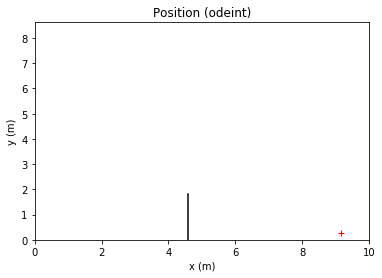

In [99]:
Counter = 0
Max_Count = 1000

dist = 10.0

plt.figure('Position')
plt.title('Position (odeint)')
# plt.plot(r_real[:,0], r_real[:,1], 'r--', cornhole_distance, cornhole_height, 'r+')
plt.plot(cornhole_distance, cornhole_height, 'r+')
plt.plot([x_annoying_spectator_position, x_annoying_spectator_position], [0, y_annoying_spectator_position], 'k-')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.xlim((0.0, 10.0))
plt.ylim(0.0, y_max)

#while(dist > cornhole_radius and Counter < Max_Count):
Counter += 1

v_initial = v_min + v_spread*np.random.rand(1)[0]
theta = theta_min + theta_spread*np.random.rand(1)[0]

print(np.random.rand(1)[0])
print(v_initial)
print(theta)

#v_initial = 10.1
#theta = 30.0

dontcare = CornholeToss2(0.5, v_initial, theta)
# print('Try Number %d:  Initial velocity: %0.2f with angle: %0.1f.  Closest Point: %0.2f m' % (Counter, v_initial, theta, dist))

# plt.plot(r[:,0], r[:,1], 'b,', r[Closest_Index:0], r[Closest_Index:1], 'r+')
# if(dist < cornhole_radius):
#     plt.plot(r[:,0], r[:,1], 'g--', r[Closest_Index:0], r[Closest_Index:1], 'r+')
#     print('I won!')
#     #break

# plt.show()